In [ ]:
import seaborn as sns
from parse_touchpad_data import TouchpadData
from sklearn.mixture import BayesianGaussianMixture
from sklearn.neighbors import KernelDensity

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [ ]:
legal = np.array(TouchpadData('../touchpad_capture/real_data/legal').data)
illegal = np.array(TouchpadData('../touchpad_capture/real_data/illegal').data)

nontouch = np.array(TouchpadData('../touchpad_capture/real_data/nontouches').data)
touch = np.concatenate((legal, illegal)) # Doesn't matter if it's a finger (legal) or a palm (illegal), only care if it's touching the touchpad or not


<AxesSubplot:ylabel='Density'>

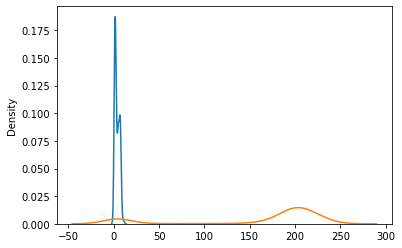

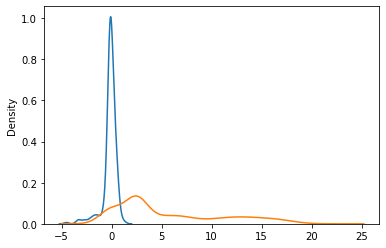

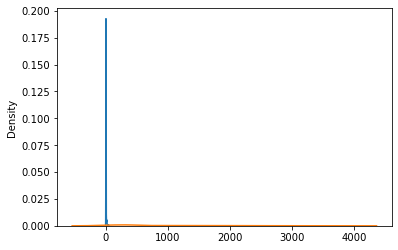

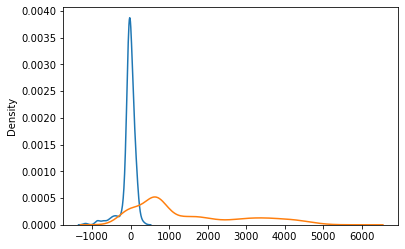

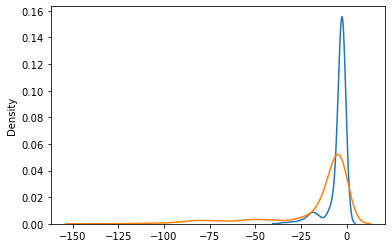

In [32]:
# There is a decent amount of data that are either data of not touching the touchpad or values right after touching the touchpad
# With a perfect feature or feature set this should be visible as a smaller gaussian to the right of a bigger gaussian that would be 
# an indicator of potentionally a good separation between good and bad data

# Plot a distribution for maximum value feature
plt.figure()
sns.kdeplot(np.max(nontouch, axis=(1,2)))
sns.kdeplot(np.max(touch, axis=(1,2)))

# Plot a distribution for mean feature
plt.figure()
sns.kdeplot(np.mean(nontouch, axis=(1,2)))
sns.kdeplot(np.mean(touch, axis=(1,2)))


# Plot a distribution for variance feature
plt.figure()
sns.kdeplot(np.var(nontouch, axis=(1,2)))
sns.kdeplot(np.var(touch, axis=(1,2)))


# Plot a distribution for sum feature
plt.figure()
sns.kdeplot(np.sum(nontouch, axis=(1,2)))
sns.kdeplot(np.sum(touch, axis=(1,2)))


# Plot a distribution for minimum value feature
plt.figure()
sns.kdeplot(np.min(nontouch, axis=(1,2)))
sns.kdeplot(np.min(touch, axis=(1,2)))



In [ ]:
distribution_max = KernelDensity().fit(np.max(nontouch, axis=(1,2)).reshape(-1, 1))
distribution_mean = KernelDensity().fit(np.mean(nontouch, axis=(1,2)).reshape(-1, 1))
distribution_var = KernelDensity().fit(np.var(nontouch, axis=(1,2)).reshape(-1, 1))
distribution_sum = KernelDensity().fit(np.sum(nontouch, axis=(1,2)).reshape(-1, 1))
distribution_min = KernelDensity().fit(np.min(nontouch, axis=(1,2)).reshape(-1, 1))

In [ ]:

plt.figure()
density_max = distribution_max.score_samples(np.max(touch, axis=(1,2)).reshape(-1, 1))
sns.kdeplot(density_max).set(title="Max values log density")

plt.figure()
density_mean = distribution_mean.score_samples(np.mean(touch, axis=(1,2)).reshape(-1, 1))
sns.kdeplot(density_mean).set(title="Means log density")

plt.figure()
density_var = distribution_var.score_samples(np.var(touch, axis=(1,2)).reshape(-1, 1))
sns.kdeplot(density_var).set(title="Variances log density")

plt.figure()
density_sum = distribution_sum.score_samples(np.sum(touch, axis=(1,2)).reshape(-1, 1))
sns.kdeplot(density_sum).set(title="Sums log density")

plt.figure()
density_min = distribution_min.score_samples(np.min(touch, axis=(1,2)).reshape(-1, 1))
sns.kdeplot(density_min).set(title="Min values log density")


In [ ]:
plt.figure()
sns.kdeplot(np.exp(density_max)).set(title="Max values density")
plt.figure()
sns.kdeplot(np.exp(density_mean)).set(title="Means density")
plt.figure()
sns.kdeplot(np.exp(density_var)).set(title="Variances density")
plt.figure()
sns.kdeplot(np.exp(density_sum)).set(title="Sums density")
plt.figure()
sns.kdeplot(np.exp(density_min)).set(title="Min values density")


In [ ]:
-4556.850819 > start

In [ ]:
for index in legal_scores.index:
    plt.imsave('out/{}.png'.format(index), legal[index], cmap='gist_heat', vmin=-10, vmax=245)


In [ ]:
sns.heatmap(legal[1164], xticklabels=False, yticklabels=False)
legal_scores[1164]

In [ ]:
sns.heatmap(legal[1], xticklabels=False, yticklabels=False)
legal_scores[1]

In [ ]:
sns.heatmap(legal[2], xticklabels=False, yticklabels=False)
legal_scores[2]